In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "imgs", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

__机器学习模型__和__训练算法__

本章讨论，机器学习模型的__理解__，__构建__，以及神经网络的__训练__

首先，以一个简单的线性回归模型，讨论两种不同的训练方式，得到模型的最优解
- 直接使用封闭方程进行求根运算，得到模型在当前训练集上的__最优参数__(即在训练集上使用损失函数达到最小的模型参数)
- 使用迭代优化方法：梯度下降(GD),
 - 在训练集上，逐渐调整模型参数以获得最小的损失函数，最终，参数会收敛到和第一种方法相同的值
 - 介绍一些梯度下降的变体形式：批量梯度下降(Bath GD)、小批量梯度下降(Mini-batch GD)、随机梯度下降(Stochastic GD)

接下来，研究更复杂的模型：多项式回归，它可以拟合非线性数据集
- 由于它比线性模型拥有__更多的参数__，于是它更容易出现模型的__过拟合__
- 因此，我将介绍如何通过__学习曲线__去判断模型是否出现过拟合
- 并介绍几种__正则化__方法以减少出现过拟合的风险

最后，将介绍两个常用于分类的模型：Logistic回归和Softmax回归

## 线性回归
一个简单的回归模型：$life\_satisfaction=\theta_0+\theta_1*GDP\_per\_capita$，该模型公公是输入量`GDP_per_capita`的线性函数，$\theta_0$和$\theta_1$是这个模型的参数

线性模型更一般化的描述指，通过计算__输入变量__的__加权和__，并加上一个__常数偏置__(截距项)来得到一个预测值。

如公式4-1：线性回归预测模型：$$\hat{y}=\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n$$
- $\hat{y}$表示预测结果
- $n$表示特征的个数
- $x_i$表示系`i`个特征的值
- $\theta_j$表示第`j`个参数(包括偏置项$\theta_{0}$和特征权重值$\theta_{1},\theta_{2},...\theta_{n}$)

怎样去训练一个线性回归模型？
- 训练一个模型指的是__设置模型的参数__，使得这个模型在训练集的表现较好
 - 首先，需要找到一个__衡量模型好坏的评定方法__，最常见的评定标准是__均方根误差(RMSE)__
 - 其次，找到一个$\theta$值，使得__均方根误差达到最小值__
 - 其实__均方误差__与__均方根误差__的$\theta$值相同，而且__最小化均方误差__比__最小化均方根误差__更简单


In [4]:
import numpy as np 
X=2*np.random.rand(100,1) 
X.shape
y=4+3*X+np.random.rand(100,1)
y.shape

(100, 1)

(100, 1)

Text(0.5,0,'$x_1$')

Text(0,0.5,'$y$')

[0, 2, 0, 15]

Saving figure generated_data_plot


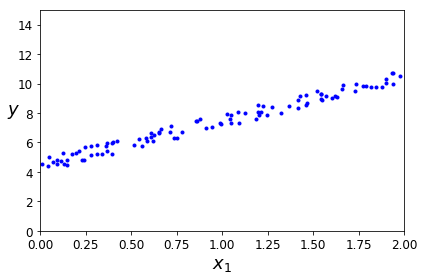

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### np测试

In [6]:
import numpy as np

"""
 将数据按照一定的格式合并
 np.r_ 第二维长度相同下，第一维长度相加，即两矩阵上下相加，
 np.c_ 第一维长度相同下，第二维长度相加，即两矩阵左右相加
"""

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c=np.c_[a,b]
c.shape,a.shape

r=np.r_[a,b,a]
r,r.shape


d =np.c_[a,b,a,b]
print("d==>",d)
print("dshape==>",d.shape)

c_cd=np.c_[c,d]
c_cd

c_ca=np.c_[c,a]
c_ca = np.c_[c_ca,a]
c_ca.shape

'\n 将数据按照一定的格式合并\n np.r_ 第二维长度相同下，第一维长度相加，即两矩阵上下相加，\n np.c_ 第一维长度相同下，第二维长度相加，即两矩阵左右相加\n'

((3, 2), (3,))

(array([1, 2, 3, 4, 5, 6, 1, 2, 3]), (9,))

d==> [[1 4 1 4]
 [2 5 2 5]
 [3 6 3 6]]
dshape==> (3, 4)


array([[1, 4, 1, 4, 1, 4],
       [2, 5, 2, 5, 2, 5],
       [3, 6, 3, 6, 3, 6]])

(3, 4)

In [7]:
ones = np.ones((100,1))
X_b = np.c_[ones,X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# X_b
# ones

array([[4.51359766],
       [2.98323418]])

In [8]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

[0, 2, 0, 15]

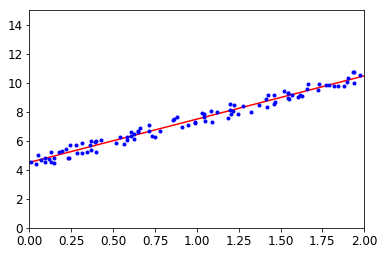

In [9]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

### 批梯度下降
损失函数的偏导数
$$
\frac{\partial}{\partial \theta_{j}} M S E(\theta)=\frac{2}{m} \sum_{i=1}^{m}\left(\theta^{T} \cdot \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}
$$
损失函数的梯度向量
$$
\nabla_{\theta} M S E(\theta)=\left( \begin{array}{c}{\frac{\partial}{\partial \theta_{0}} M S E(\theta)} \\ {\frac{\partial}{\partial \theta_{1}} M S E(\theta)} \\ {\vdots} \\ {\frac{\partial}{\partial \theta_{n}} M S E(\theta)}\end{array}\right)=\frac{2}{m} \mathbf{X}^{T} \cdot(\mathbf{X} \cdot \theta-y)
$$

In [10]:
eta = 0.1 #学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 随机初始值

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.51359766],
       [2.98323418]])

###  随机梯度下降
- 在每一步的梯度计算上只随机选取训练集中的__一个样本__
- 只是在大体上呈下降趋势,最后它会在__最小值__附近摆动
- 随机梯度下降在寻找__全局最小值__上比批量梯度下降表现要好

In [13]:
n_epochs = 50
t0, t1 = 5, 50  #learning_schedule的超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

xi
yi
theta

array([[1.        , 0.98759119]])

array([[7.31198315]])

array([[4.49544544],
       [2.98696786]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
y.shape
y.ravel().shape
#sgd_reg.intercept_

(100, 1)

(100,)

###  多项式回归


In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
X.shape

(100, 1)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
X.shape,X_poly.shape

((100, 1), (100, 2))

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ #截距
lin_reg.coef_ #相关系数

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([1.96414128])

array([[0.87470856, 0.51947889]])

模型预测函数$$\hat{y}=0.51 x_{1}^{2}+0.87 x_{1}+1.96$$
原始函数$$y=0.5 x_{1}^{2}+1.0 x_{1}+2.0$$

#### 学习曲线
那我们该如何决定我们模型的复杂度呢？你如何告诉我你的模型是过拟合还是欠拟合？
- 使用交叉验证来估计一个模型的泛化能力（第二章提到）
- 观察学习曲线
 > 画出模型在训练集上的表现，同时画出以训练集规模为自变量的训练集函数。

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

[0, 80, 0, 3]

Saving figure underfitting_learning_curves_plot


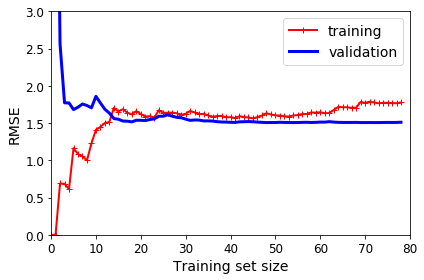

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

## 线性模型的正则化
对于一个线性模型，正则化的典型实现就是约束模型中参数的__权重__。

接下来我们将介绍三种不同约束权重的方法：Ridge 回归，Lasso 回归和 Elastic Net。

###  岭（Ridge）回归

岭回归损失函数
$$
J(\theta)=M S E(\theta)+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}
$$

Text(0,0.5,'$y$')

Saving figure ridge_regression_plot


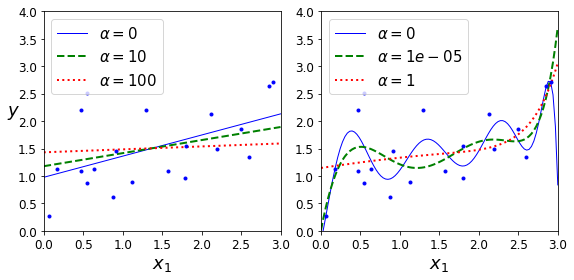

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

岭回归的封闭方程的解
- 矩阵 $\mathbf{A}$ 是一个除了左上角有一个 0 的 $n \times n $的单位矩，这个 0 代表偏差项。
$$
\hat{\theta}=\left(\mathbf{X}^{T} \cdot \mathbf{X}+\alpha \mathbf{A}\right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}
$$

In [45]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

array([[1.55071465]])

In [46]:
y.shape

(20, 1)

In [47]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

d:\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

array([1.12795912])